<a href="https://colab.research.google.com/github/james130625/notebook/blob/main/4_%EC%A1%B0%EA%B1%B4%EC%97%90_%EB%A7%9E%EB%8A%94_%EC%83%81%EC%9C%84_10%EA%B0%9C_KOSDAQ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

,Code,Current Price,Avg Volume,Volatility
0,045970,8530,830172.148256,0.637764
2,277070,7380,654840.581395,0.762829
1,337930,5120,373862.529070,0.443649
4,363250,6370,230086.052326,0.804420
3,376980,6740,111019.537791,0.471859


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

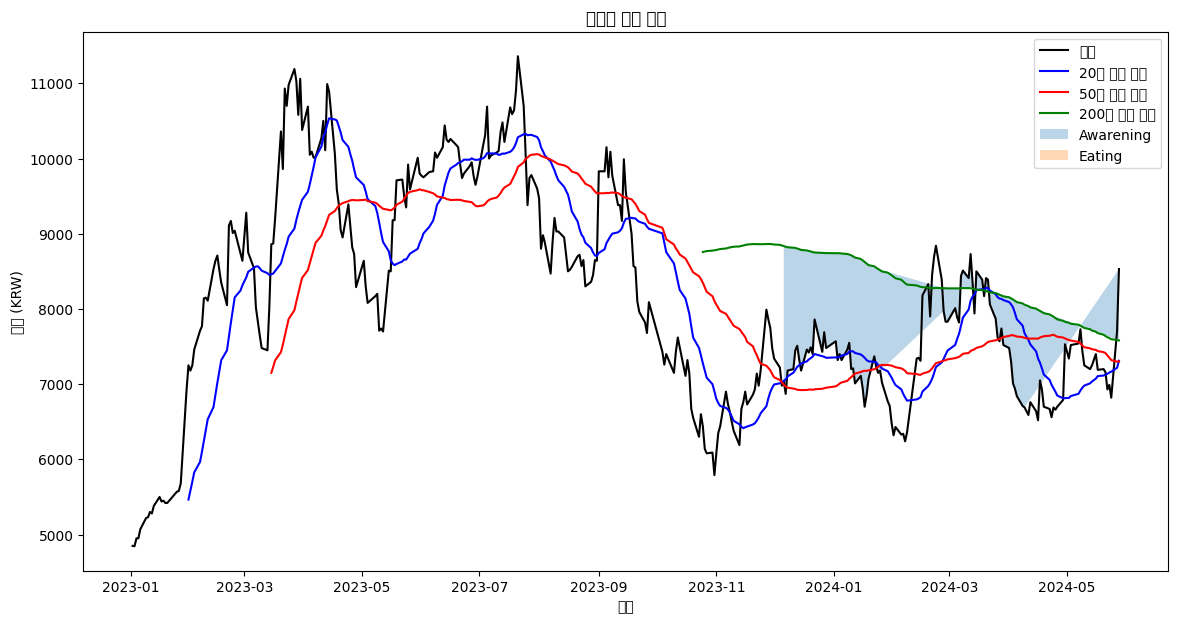

현재 단계: Awarening
실시간 현재가: 8530
최근 종가: 8530
현재 추세: 상승 추세
52주 최고가: 11360.0
52주 최저가: 5790.0
52주 적정 매수가: 8575.0
매수 범위: (8146.25, 9003.75)
1차 매수 목표: 8146.25
2차 매수 목표: 8575.0
3차 매수 목표: 9003.75
익절가: 12496.000000000002
손절가: 5500.5


In [4]:
# 필요한 패키지 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# FinanceDataReader 설치
!pip install finance-datareader

# matplotlib, pandas 임포트 및 주피터 출력 설정, 한글 폰트 지정
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from datetime import datetime

plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 출력을 위한 폰트 설정

# KOSDAQ 상장 목록 가져오기
kosdaq_list = fdr.StockListing('KOSDAQ')

# 필터링 조건
price_lower = 5000
price_upper = 10000

# 필터링된 데이터프레임 저장용 리스트
filtered_stocks_data = []

# 오늘 날짜 구하기
today = datetime.today().strftime('%Y-%m-%d')

# 각 종목의 데이터를 가져와서 조건에 맞는지 확인
for code in kosdaq_list['Code']:
    try:
        # 종목 데이터 불러오기 (2023-01-02부터 오늘까지)
        data = fdr.DataReader(code, '2023-01-02', today)

        # 종가가 5000-10000 사이에 있는지 확인
        if data['Close'].iloc[-1] < price_lower or data['Close'].iloc[-1] > price_upper:
            continue

        # 거래량 평균 계산
        avg_volume = data['Volume'].mean()

        # 변동폭 계산 (종가의 표준편차)
        volatility = data['Close'].pct_change().std() * np.sqrt(252)

        # 최근 종가와 이동평균선 계산
        recent_close = data['Close'].iloc[-1]
        short_ma = data['Close'].rolling(window=5).mean()
        long_ma = data['Close'].rolling(window=20).mean()

        # Eating phase 확인
        if short_ma.iloc[-1] > long_ma.iloc[-1] and short_ma.iloc[-2] <= long_ma.iloc[-2]:
            filtered_stocks_data.append({
                'Code': code,
                'Current Price': recent_close,
                'Avg Volume': avg_volume,
                'Volatility': volatility
            })
    except Exception as e:
        # 데이터 불러오기에 실패하면 무시
        print(f"Failed to process {code}: {e}")
        continue

# 필터링된 종목 데이터프레임 생성
filtered_stocks_df = pd.DataFrame(filtered_stocks_data)

# 거래량이 많고 변동성이 높은 순으로 정렬
filtered_stocks_df = filtered_stocks_df.sort_values(by=['Avg Volume', 'Volatility'], ascending=[False, False])

# 상위 10개 종목 선정
top_10_stocks_df = filtered_stocks_df.head(10)

# 결과 출력
print("조건에 맞는 상위 10개 종목 목록:")
print(top_10_stocks_df)

# 필터링된 종목 리스트 데이터프레임 출력 함수
def display_dataframe_to_user(name: str, dataframe: pd.DataFrame) -> None:
    from IPython.display import display, HTML
    display(HTML(f"<h2>{name}</h2>"))
    display(dataframe)

display_dataframe_to_user(name="조건에 맞는 상위 10개 KOSDAQ 종목 목록", dataframe=top_10_stocks_df)

# 주식 데이터 가져오기
for ticker in top_10_stocks_df['Code']
stock_data = fdr.DataReader(ticker, '2023-01-02', today)

# 이동 평균 계산
stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# 데이터 플로팅
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='종가', color='black')
plt.plot(stock_data['SMA20'], label='20일 이동 평균', color='blue')
plt.plot(stock_data['SMA50'], label='50일 이동 평균', color='red')
plt.plot(stock_data['SMA200'], label='200일 이동 평균', color='green')
plt.title('주가와 이동 평균')
plt.xlabel('날짜')
plt.ylabel('가격 (KRW)')
plt.legend()

# 단계 식별: Sleeping,Awarening,Eating
stock_data['Phase'] = 'Sleeping'

# 다른 단계에 대한 조건 설정
conditions = [
    (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] > stock_data['SMA200']),
    (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] < stock_data['SMA200']),
]

choices = ['Eating', 'Awarening']

stock_data['Phase'] = np.select(conditions, choices, default='Sleeping')

# 단계 플로팅
phases = stock_data[stock_data['Phase'] != 'Sleeping']
for phase in ['Awarening', 'Eating']:
    phase_data = phases[phases['Phase'] == phase]
    plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

plt.legend()
plt.show()

# 최신 데이터 포인트의 단계 표시
current_phase = stock_data['Phase'].iloc[-1]

# 실시간 가격 가져오기 (실제 API를 통해 가져와야 하지만 여기서는 예시로 제공)
def fetch_current_price(ticker):
    # 여기에 실시간 가격을 가져오는 코드를 추가합니다.
    # 현재는 예시로 최근 종가를 사용합니다.
    return stock_data['Close'].iloc[-1]

current_price = fetch_current_price(ticker)

# 단계가 포함된 데이터프레임 저장
stock_data.to_csv("Stock_Phases.csv")

# 추가 메트릭 계산
latest_close = stock_data['Close'].iloc[-1]
current_trend = "상승 추세" if stock_data['SMA20'].iloc[-1] > stock_data['SMA50'].iloc[-1] else "하락 추세"
fifty_two_week_high = stock_data['Close'].rolling(window=252).max().iloc[-1]
fifty_two_week_low = stock_data['Close'].rolling(window=252).min().iloc[-1]
ideal_buy_price = (fifty_two_week_high + fifty_two_week_low) / 2

# 매수 범위와 목표 정의
buy_range = (ideal_buy_price * 0.95, ideal_buy_price * 1.05)
first_buy_target = buy_range[0]
second_buy_target = ideal_buy_price
third_buy_target = buy_range[1]
profit_target = fifty_two_week_high * 1.1
stop_loss = fifty_two_week_low * 0.95

# 결과 표시
print("현재 단계:", current_phase)
print("실시간 현재가:", current_price)
print("최근 종가:", latest_close)
print("현재 추세:", current_trend)
print("52주 최고가:", fifty_two_week_high)
print("52주 최저가:", fifty_two_week_low)
print("52주 적정 매수가:", ideal_buy_price)
print("매수 범위:", buy_range)
print("1차 매수 목표:", first_buy_target)
print("2차 매수 목표:", second_buy_target)
print("3차 매수 목표:", third_buy_target)
print("익절가:", profit_target)
print("손절가:", stop_loss)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,576 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

,Code,Current Price,Avg Volume,Volatility
0,045970,8530,830172.148256,0.637764
2,277070,7380,654840.581395,0.762829
1,337930,5120,373862.529070,0.443649
4,363250,6370,230086.052326,0.804420
3,376980,6740,111019.537791,0.471859


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

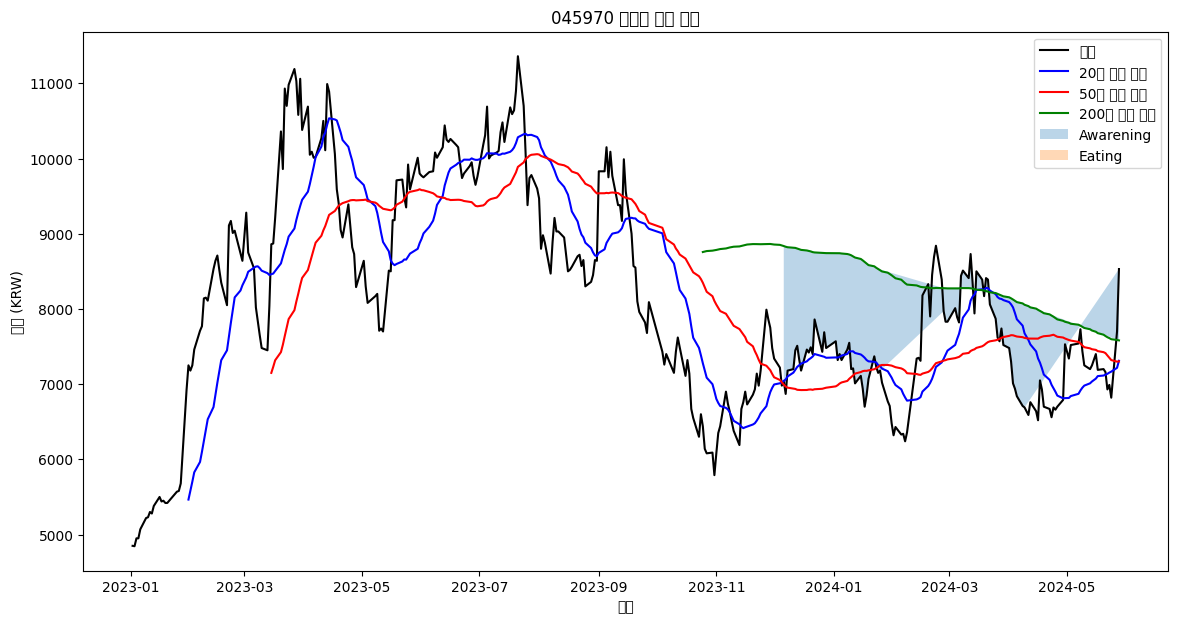

<ipython-input-1-b19863e2e248>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
<ipython-input-1-b19863e2e248>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
<ipython-input-1-b19863e2e248>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

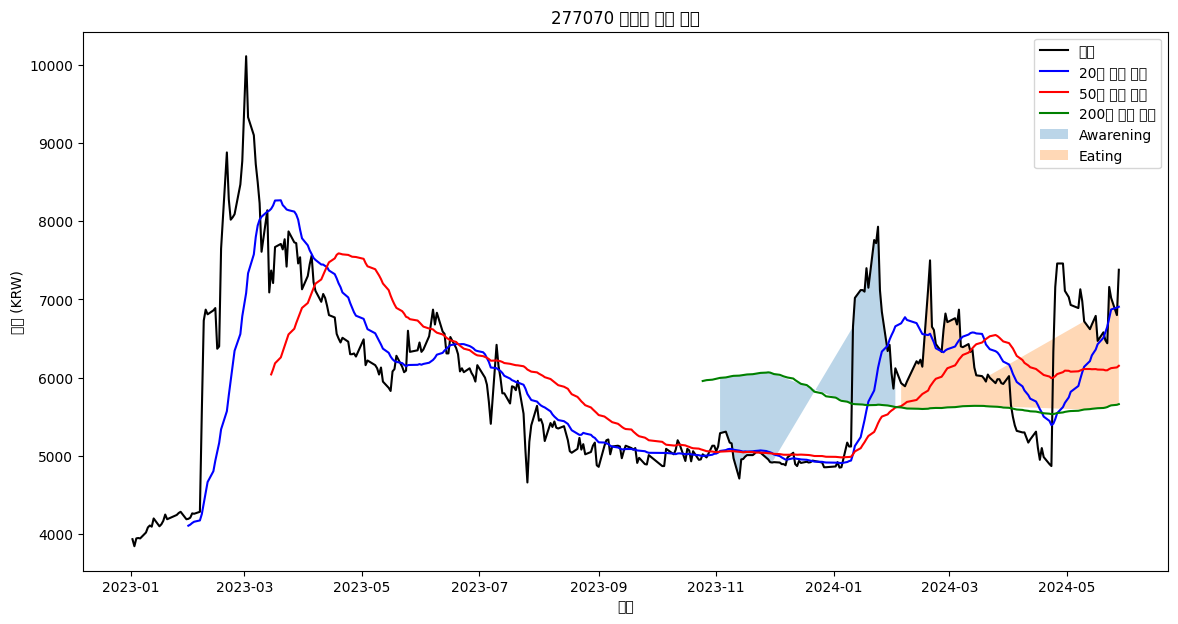

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

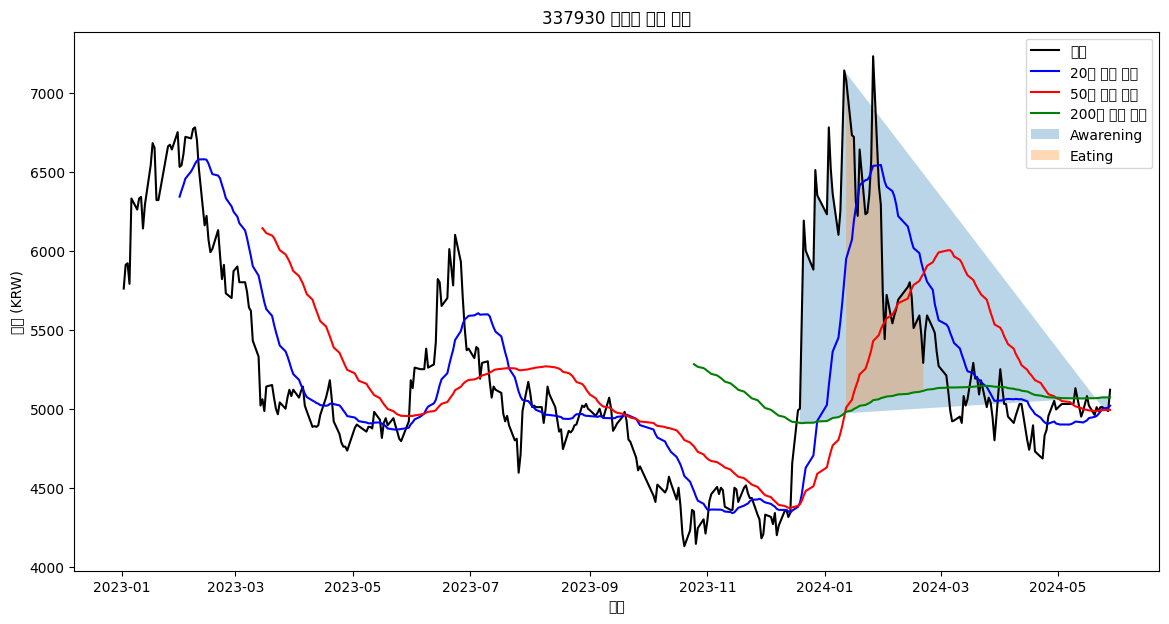

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

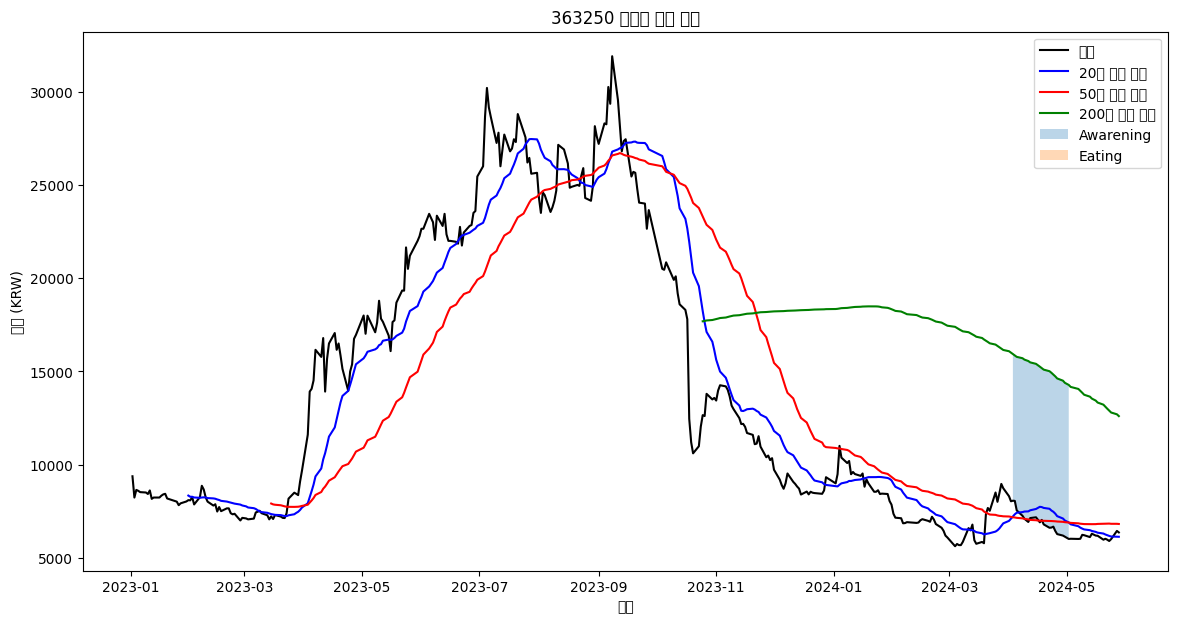

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

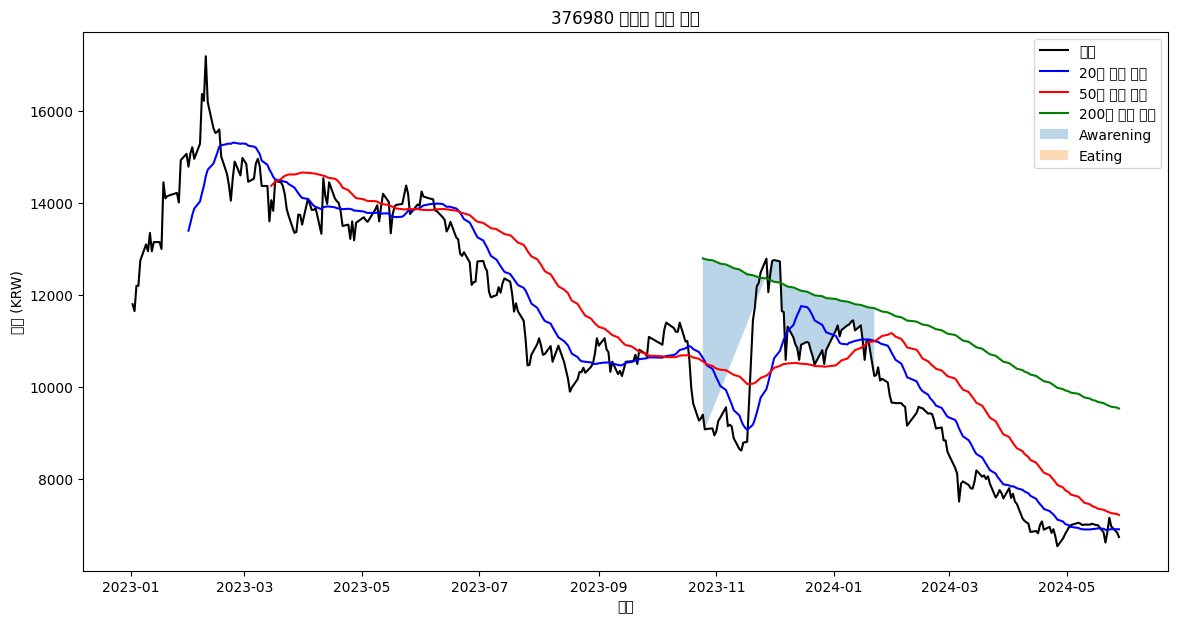

In [1]:
# 필요한 패키지 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# FinanceDataReader 설치
!pip install finance-datareader

# matplotlib, pandas 임포트 및 주피터 출력 설정, 한글 폰트 지정
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from datetime import datetime

plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 출력을 위한 폰트 설정

# KOSDAQ 상장 목록 가져오기
kosdaq_list = fdr.StockListing('KOSDAQ')

# 필터링 조건
price_lower = 5000
price_upper = 10000

# 필터링된 데이터프레임 저장용 리스트
filtered_stocks_data = []

# 오늘 날짜 구하기
today = datetime.today().strftime('%Y-%m-%d')

# 각 종목의 데이터를 가져와서 조건에 맞는지 확인
for code in kosdaq_list['Code']:
    try:
        # 종목 데이터 불러오기 (2023-01-02부터 오늘까지)
        data = fdr.DataReader(code, '2023-01-02', today)

        # 종가가 5000-10000 사이에 있는지 확인
        if data['Close'].iloc[-1] < price_lower or data['Close'].iloc[-1] > price_upper:
            continue

        # 거래량 평균 계산
        avg_volume = data['Volume'].mean()

        # 변동폭 계산 (종가의 표준편차)
        volatility = data['Close'].pct_change().std() * np.sqrt(252)

        # 최근 종가와 이동평균선 계산
        recent_close = data['Close'].iloc[-1]
        short_ma = data['Close'].rolling(window=5).mean()
        long_ma = data['Close'].rolling(window=20).mean()

        # Eating phase 확인
        if short_ma.iloc[-1] > long_ma.iloc[-1] and short_ma.iloc[-2] <= long_ma.iloc[-2]:
            filtered_stocks_data.append({
                'Code': code,
                'Current Price': recent_close,
                'Avg Volume': avg_volume,
                'Volatility': volatility
            })
    except Exception as e:
        # 데이터 불러오기에 실패하면 무시
        print(f"Failed to process {code}: {e}")
        continue

# 필터링된 종목 데이터프레임 생성
filtered_stocks_df = pd.DataFrame(filtered_stocks_data)

# 거래량이 많고 변동성이 높은 순으로 정렬
filtered_stocks_df = filtered_stocks_df.sort_values(by=['Avg Volume', 'Volatility'], ascending=[False, False])

# 상위 10개 종목 선정
top_10_stocks_df = filtered_stocks_df.head(10)

# 결과 출력
print("조건에 맞는 상위 10개 종목 목록:")
print(top_10_stocks_df)

# 필터링된 종목 리스트 데이터프레임 출력 함수
def display_dataframe_to_user(name: str, dataframe: pd.DataFrame) -> None:
    from IPython.display import display, HTML
    display(HTML(f"<h2>{name}</h2>"))
    display(dataframe)

display_dataframe_to_user(name="조건에 맞는 상위 10개 KOSDAQ 종목 목록", dataframe=top_10_stocks_df)

# 각 종목에 대해 이동 평균을 계산하고 시각화
for ticker in top_10_stocks_df['Code']:
    stock_data = fdr.DataReader(ticker, '2023-01-02', today)

    # 이동 평균 계산
    stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

    # 데이터 플로팅
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='종가', color='black')
    plt.plot(stock_data['SMA20'], label='20일 이동 평균', color='blue')
    plt.plot(stock_data['SMA50'], label='50일 이동 평균', color='red')
    plt.plot(stock_data['SMA200'], label='200일 이동 평균', color='green')
    plt.title(f'{ticker} 주가와 이동 평균')
    plt.xlabel('날짜')
    plt.ylabel('가격 (KRW)')
    plt.legend()

    # 단계 식별: Sleeping,Awarening,Eating
    stock_data['Phase'] = 'Sleeping'

    # 다른 단계에 대한 조건 설정
    conditions = [
        (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] > stock_data['SMA200']),
        (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] < stock_data['SMA200']),
    ]

    choices = ['Eating', 'Awarening']

    stock_data['Phase'] = np.select(conditions, choices, default='Sleeping')

    # 단계 플로팅
    phases = stock_data[stock_data['Phase'] != 'Sleeping']
    for phase in ['Awarening', 'Eating']:
        phase_data = phases[phases['Phase'] == phase]
        plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

    plt.legend()
    plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,646 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 117924 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

,Code,Current Price,Avg Volume,Volatility
1,110020,7070,153129.420290,0.782041
0,367000,7030,106093.782609,0.454397
2,109080,9210,62714.620290,0.434803


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

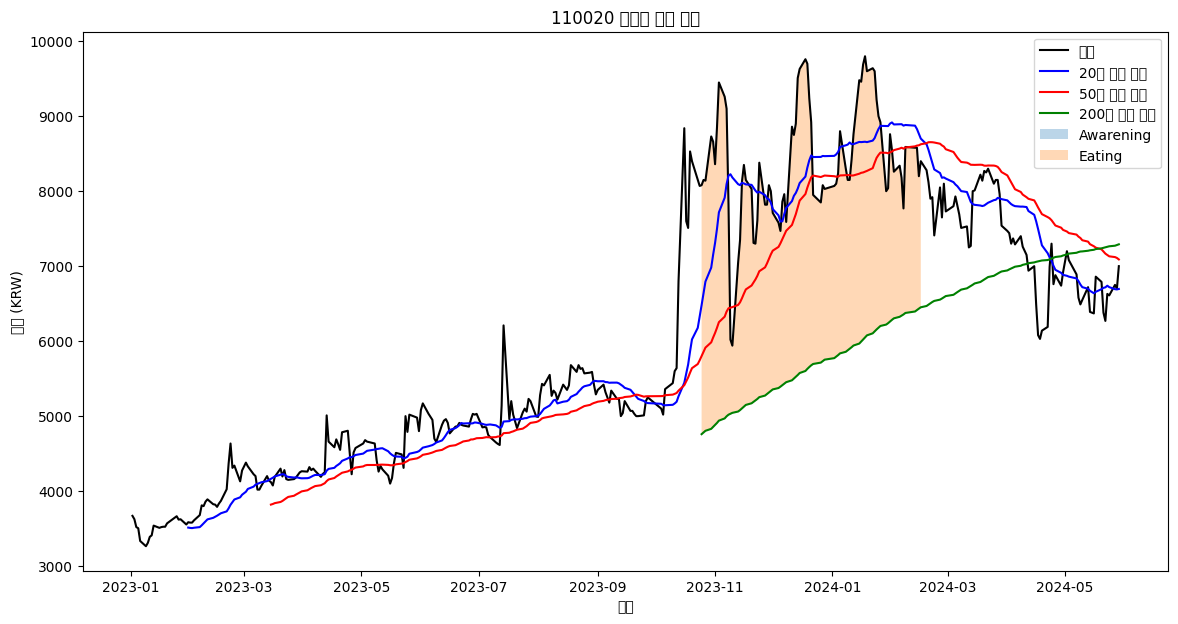

종목 코드: 110020
현재 단계: Sleeping
실시간 현재가: 7000
최근 종가: 7000
현재 추세: 하락 추세
52주 최고가: 9800.0
52주 최저가: 4310.0
52주 적정 매수가: 7055.0
매수 범위: (6702.25, 7407.75)
1차 매수 목표: 6702.25
2차 매수 목표: 7055.0
3차 매수 목표: 7407.75
익절가: 10780.0
손절가: 4094.5


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

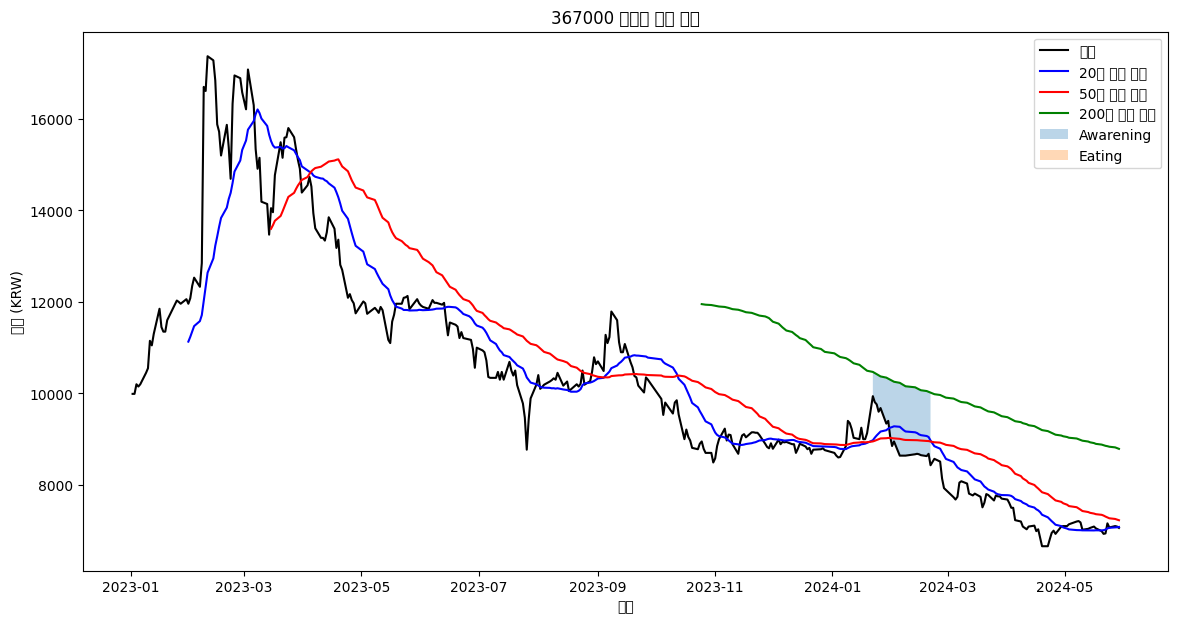

종목 코드: 367000
현재 단계: Sleeping
실시간 현재가: 7060
최근 종가: 7060
현재 추세: 하락 추세
52주 최고가: 12130.0
52주 최저가: 6660.0
52주 적정 매수가: 9395.0
매수 범위: (8925.25, 9864.75)
1차 매수 목표: 8925.25
2차 매수 목표: 9395.0
3차 매수 목표: 9864.75
익절가: 13343.000000000002
손절가: 6327.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

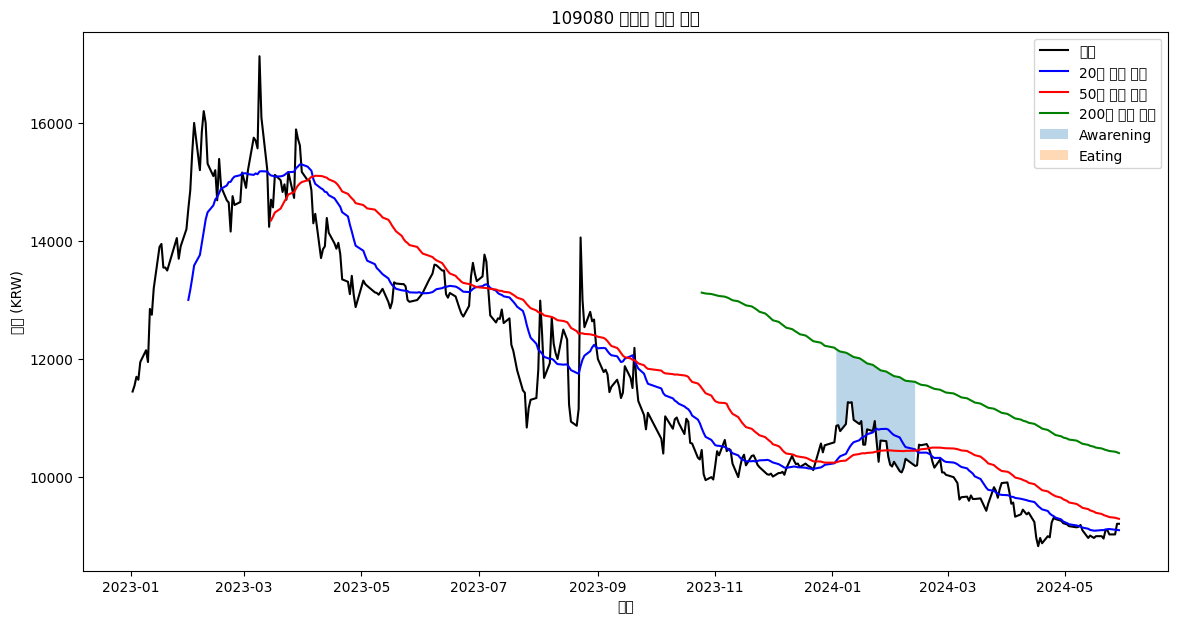

종목 코드: 109080
현재 단계: Sleeping
실시간 현재가: 9210
최근 종가: 9210
현재 추세: 하락 추세
52주 최고가: 14060.0
52주 최저가: 8830.0
52주 적정 매수가: 11445.0
매수 범위: (10872.75, 12017.25)
1차 매수 목표: 10872.75
2차 매수 목표: 11445.0
3차 매수 목표: 12017.25
익절가: 15466.000000000002
손절가: 8388.5


In [1]:
# 필요한 패키지 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# FinanceDataReader 설치
!pip install finance-datareader

# matplotlib, pandas 임포트 및 주피터 출력 설정, 한글 폰트 지정
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from datetime import datetime

plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 출력을 위한 폰트 설정

# KOSDAQ 상장 목록 가져오기
kosdaq_list = fdr.StockListing('KOSDAQ')

# 필터링 조건
price_lower = 5000
price_upper = 10000

# 필터링된 데이터프레임 저장용 리스트
filtered_stocks_data = []

# 오늘 날짜 구하기
today = datetime.today().strftime('%Y-%m-%d')

# 각 종목의 데이터를 가져와서 조건에 맞는지 확인
for code in kosdaq_list['Code']:
    try:
        # 종목 데이터 불러오기 (2023-01-02부터 오늘까지)
        data = fdr.DataReader(code, '2023-01-02', today)

        # 종가가 5000-10000 사이에 있는지 확인
        if data['Close'].iloc[-1] < price_lower or data['Close'].iloc[-1] > price_upper:
            continue

        # 거래량 평균 계산
        avg_volume = data['Volume'].mean()

        # 변동폭 계산 (종가의 표준편차)
        volatility = data['Close'].pct_change().std() * np.sqrt(252)

        # 최근 종가와 이동평균선 계산
        recent_close = data['Close'].iloc[-1]
        short_ma = data['Close'].rolling(window=5).mean()
        long_ma = data['Close'].rolling(window=20).mean()

        # Eating phase 확인
        if short_ma.iloc[-1] > long_ma.iloc[-1] and short_ma.iloc[-2] <= long_ma.iloc[-2]:
            filtered_stocks_data.append({
                'Code': code,
                'Current Price': recent_close,
                'Avg Volume': avg_volume,
                'Volatility': volatility
            })
    except Exception as e:
        # 데이터 불러오기에 실패하면 무시
        print(f"Failed to process {code}: {e}")
        continue

# 필터링된 종목 데이터프레임 생성
filtered_stocks_df = pd.DataFrame(filtered_stocks_data)

# 거래량이 많고 변동성이 높은 순으로 정렬
filtered_stocks_df = filtered_stocks_df.sort_values(by=['Avg Volume', 'Volatility'], ascending=[False, False])

# 상위 10개 종목 선정
top_10_stocks_df = filtered_stocks_df.head(10)

# 결과 출력
print("조건에 맞는 상위 10개 종목 목록:")
print(top_10_stocks_df)

# 필터링된 종목 리스트 데이터프레임 출력 함수
from IPython.display import display, HTML

def display_dataframe_to_user(name: str, dataframe: pd.DataFrame) -> None:
    display(HTML(f"<h2>{name}</h2>"))
    display(dataframe)

display_dataframe_to_user(name="조건에 맞는 상위 10개 KOSDAQ 종목 목록", dataframe=top_10_stocks_df)

# 주식 데이터 가져오기
for ticker in top_10_stocks_df['Code']:
    stock_data = fdr.DataReader(ticker, '2023-01-02', today)

    # 이동 평균 계산
    stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

    # 데이터 플로팅
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='종가', color='black')
    plt.plot(stock_data['SMA20'], label='20일 이동 평균', color='blue')
    plt.plot(stock_data['SMA50'], label='50일 이동 평균', color='red')
    plt.plot(stock_data['SMA200'], label='200일 이동 평균', color='green')
    plt.title(f'{ticker} 주가와 이동 평균')
    plt.xlabel('날짜')
    plt.ylabel('가격 (KRW)')
    plt.legend()

    # 단계 식별: Sleeping, Awarening, Eating
    stock_data['Phase'] = 'Sleeping'

    # 다른 단계에 대한 조건 설정
    conditions = [
        (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] > stock_data['SMA200']),
        (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] < stock_data['SMA200']),
    ]

    choices = ['Eating', 'Awarening']

    stock_data['Phase'] = np.select(conditions, choices, default='Sleeping')

    # 단계 플로팅
    phases = stock_data[stock_data['Phase'] != 'Sleeping']
    for phase in ['Awarening', 'Eating']:
        phase_data = phases[phases['Phase'] == phase]
        plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

    plt.legend()
    plt.show()

    # 최신 데이터 포인트의 단계 표시
    current_phase = stock_data['Phase'].iloc[-1]

    # 실시간 가격 가져오기 (실제 API를 통해 가져와야 하지만 여기서는 예시로 제공)
    def fetch_current_price(ticker):
        # 여기에 실시간 가격을 가져오는 코드를 추가합니다.
        # 현재는 예시로 최근 종가를 사용합니다.
        return stock_data['Close'].iloc[-1]

    current_price = fetch_current_price(ticker)

    # 단계가 포함된 데이터프레임 저장
    stock_data.to_csv(f"{ticker}_Stock_Phases.csv")

    # 추가 메트릭 계산
    latest_close = stock_data['Close'].iloc[-1]
    current_trend = "상승 추세" if stock_data['SMA20'].iloc[-1] > stock_data['SMA50'].iloc[-1] else "하락 추세"
    fifty_two_week_high = stock_data['Close'].rolling(window=252).max().iloc[-1]
    fifty_two_week_low = stock_data['Close'].rolling(window=252).min().iloc[-1]
    ideal_buy_price = (fifty_two_week_high + fifty_two_week_low) / 2

    # 매수 범위와 목표 정의
    buy_range = (ideal_buy_price * 0.95, ideal_buy_price * 1.05)
    first_buy_target = buy_range[0]
    second_buy_target = ideal_buy_price
    third_buy_target = buy_range[1]
    profit_target = fifty_two_week_high * 1.1
    stop_loss = fifty_two_week_low * 0.95

    # 결과 표시
    print(f"종목 코드: {ticker}")
    print("현재 단계:", current_phase)
    print("실시간 현재가:", current_price)
    print("최근 종가:", latest_close)
    print("현재 추세:", current_trend)
    print("52주 최고가:", fifty_two_week_high)
    print("52주 최저가:", fifty_two_week_low)
    print("52주 적정 매수가:", ideal_buy_price)
    print("매수 범위:", buy_range)
    print("1차 매수 목표:", first_buy_target)
    print("2차 매수 목표:", second_buy_target)
    print("3차 매수 목표:", third_buy_target)
    print("익절가:", profit_target)
    print("손절가:", stop_loss)
    print("="*50)
